In [1]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd


df = pd.read_csv("C:/Users/habee/OneDrive/Desktop/house_prices.csv")


print(df.head())


print(df.columns)


   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    than

Available Columns: Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')
✅ Model Performance:
Mean Squared Error: 890497331.19
R² Score: 0.0035


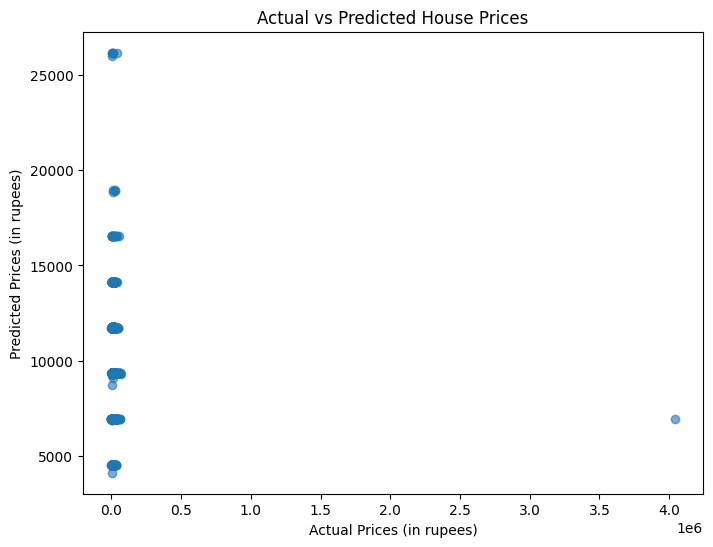

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("C:/Users/habee/OneDrive/Desktop/house_prices.csv")


print("Available Columns:", df.columns)

df = df[['Carpet Area', 'Bathroom', 'Price (in rupees)']]


df = df.dropna()


df['Carpet Area'] = df['Carpet Area'].astype(str).str.extract('(\d+)').astype(float)


df['Bathroom'] = df['Bathroom'].astype(str).str.extract('(\d+)').astype(float)

# 🔹 Convert 'Price (in rupees)' to numeric
df['Price (in rupees)'] = pd.to_numeric(df['Price (in rupees)'], errors='coerce')

# 🔹 Drop any rows with missing values after conversion
df = df.dropna()

# 🔹 Define features (X) and target (y)
X = df[['Carpet Area', 'Bathroom']]
y = df['Price (in rupees)']

# 🔹 Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Predict on test data
y_pred = model.predict(X_test)

# 🔹 Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# 🔹 Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices (in rupees)")
plt.ylabel("Predicted Prices (in rupees)")
plt.title("Actual vs Predicted House Prices")
plt.show()
